In [2]:
! pip install git-python

In [2]:
# 수업에 사용할 data 다운로드
!git clone https://github.com/nayeho/robot

# workspace 에 robot 폴더 생김

fatal: destination path 'robot' already exists and is not an empty directory.


In [5]:
# 나중에 진행 할 폐암 수술 환자의 생존율 예측 코드
from tensorflow.keras.models import Sequential # Keras 에서 필요한 함수들 호출
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [62]:
# 폐암 수술 환자 Data Loading
Data_set = np.loadtxt("robot/data/ThoraricSurgery3.csv",delimiter=",")
df = pd.DataFrame(Data_set)

X = Data_set[ :, : 16]
y = Data_set[ : , 16]

# 딥러닝 모델 설정
model = Sequential() # 딥 러닝 모델 구조 결정
model.add(Dense(30,input_dim = 16, activation="relu"))
model.add(Dense(1,activation = "sigmoid"))    

# 학습
model.compile(loss="binary_crossentropy",optimizer ="adam",metrics=["accuracy"])
model.fit(X,y,epochs=50,batch_size = 16)

Epoch 1/50


C:\ProgramData\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8489 - loss: 0.5283   
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4597 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4298 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4416 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4252 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4252 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4208 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4223 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4248 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4131 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4161 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - 

In [63]:
# 1 부터 100까지의 합을 total 에 누적시켜 출력
total = 0
for i in range(1,101):
    total += i
print(total)

total2 = sum(i for i in range(1,101))
print(total2)

5050
5050


In [64]:
# 오늘의 목표
# 정말 가능하다면 딥 러닝 로직을 손수 구형

# 층을 쌓기 위해
# 회귀, 로지스틱 회귀 개념

#회귀 input이 1개인 simple 여러개인 multiple.

# 공부한 시간에 따른 성적 관련 모델 구축
X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 7시간을 공부하면 몇 점 받을 수 있는지?
# 85점을 받으려면 몇 시간 공부하면 되는지?

mean_X = np.mean(X)
mean_y = np.mean(y)
print(mean_X, mean_y)

# 기울기 구하기
divisor = sum((x - mean_X)**2 for x in X)
print("분모 :", divisor)

# 분자
divided = sum((i - mean_X) * (j - mean_y) for (i, j) in zip(X, y))
print("분자 : ", divided)

# 기울기 a
a = divided / divisor
print("기울기 a :", a)

# y 절편 b
b = mean_y - (mean_X * a)
print("y절편 :", b)

5.0 90.5
분모 : 20.0
분자 :  46.0
기울기 a : 2.3
y절편 : 79.0


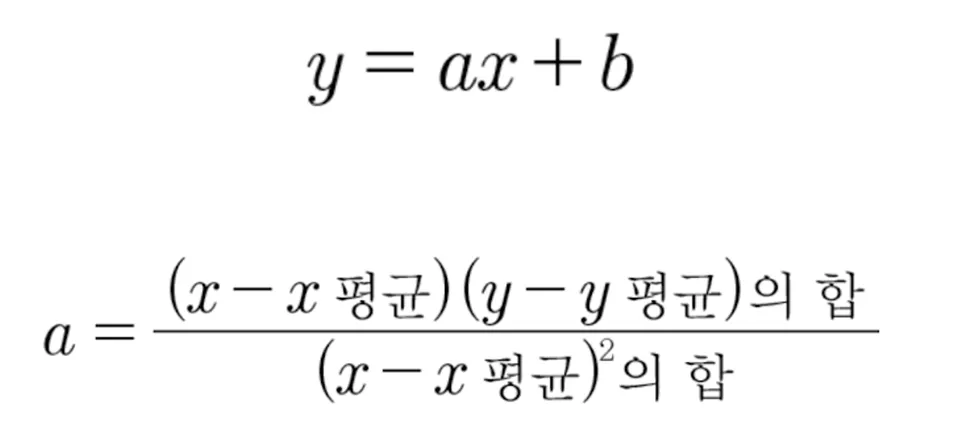

In [66]:
# 우리의 모델로 오차를 측정해 보자.
def predict(X):
    y_pred = a * X + b
    return y_pred
predict(7) # 7시간 공부하면 95.1 점 나온다.

predict_list = []
for x in X:
    y_pred = predict(x)
    predict_list.append(y_pred)
print(predict_list)

# 오차  = 실제 값 - 예측 값
# MSE(Mean Square Error)
# 오차 제곱 합
total = sum((y_real - y_pred)**2 for (y_real,y_pred) in zip(y,predict_list))
print(total)

MSE = total / len(X)
print("오차 제곱 합 :",MSE)

# 실제 값과 예측 값이 얼마나 떨어져 있는지 정도
# MSE 가 줄면 더 좋은 예측이다.
# 어떻게 오차를 줄여 나가야 할 것인가 ?

# 접선의 기울기가 0에 가까울 수록 오차가 최소가 됨.
# 특정 m 지점에서 오차가 최소이려면 해당 지점에서 접선의 기울기가 0임. 

[np.float64(83.6), np.float64(88.2), np.float64(92.8), np.float64(97.4)]
33.19999999999994
오차 제곱 합 : 8.299999999999985


In [73]:
# a, b, X, y가 정의되어 있어야 함!!
a = divided / divisor # 2.3
b = mean_y - (mean_X * a) # 79.0

def predict(X, a, b):
    y_pred = a * X + b
    return y_pred

# MSE 구하는 함수 정의
def MSE(X, y, a, b):
    predict_list = []
    for x in X:
        y_pred = predict(x, a, b)
        predict_list.append(y_pred)

    total = sum((y_real - y_pred) ** 2 for (y_real, y_pred) in zip(y, predict_list))

    result = total / len(X)
    return result

print(MSE(X, y, a, b))

#만약 a=3이면 MSE가 어떻게 되는지 ?
print(MSE(X,y,3,b))
print(MSE(X,y,2,b))
print(MSE(X,y,2.2,b))
print(MSE(X,y,2.35,b))



8.299999999999985
23.0
11.0
8.600000000000017
8.374999999999982


In [90]:
# 편미분해서 오차를 확인하고
# 기울기를 수정해 나가는 방식

# 경사 하강법

# 초반 값 모름
a, b = 0, 0
# 학습률 (Learning rate) # 학습률이 너무 크면 발산하게 됨, 너무 작으면 시간이 오래걸림 > 적절한 학습률이 필요.
lr = 0.03  
# 몇 번 진행하는가 ? 에포크
epochs = 1001

for i in range(epochs):
    n = len(X)
    a_diff = -(2 / n) * sum(x_i * (y_i - (a * x_i + b)) for (x_i, y_i) in zip(X, y))
    b_diff = -(2 / n) * sum(y_i - (a * x_i + b) for (x_i, y_i) in zip(X, y))
    if i % 100 ==0:
        print(f"epochs : {i}, 기울기 : {a}, y 절편: {b}")
        
    # 편미분이 0을 향하도록 a,b를 수정
    # a,b 를 얼마나 수정 할 것인가 ? -> 학습률
    a = a - lr * a_diff
    b = b - lr * b_diff

epochs : 0, 기울기 : 0, y 절편: 0
epochs : 100, 기울기 : 7.12075366611052, y 절편: 50.231795437463965
epochs : 200, 기울기 : 4.113643046202842, y 절편: 68.17695394091768
epochs : 300, 기울기 : 2.9823207314587843, y 절편: 74.9282016827369
epochs : 400, 기울기 : 2.5566996750287507, y 절편: 77.4681261221693
epochs : 500, 기울기 : 2.3965744115952368, y 절편: 78.4236852135748
epochs : 600, 기울기 : 2.3363327961904123, y 절편: 78.78318141078128
epochs : 700, 기울기 : 2.3136689632088885, y 절편: 78.91842947337439
epochs : 800, 기울기 : 2.3051424766270814, y 절편: 78.96931189877239
epochs : 900, 기울기 : 2.3019346797160813, y 절편: 78.98845465885884
epochs : 1000, 기울기 : 2.300727856609813, y 절편: 78.99565646303506


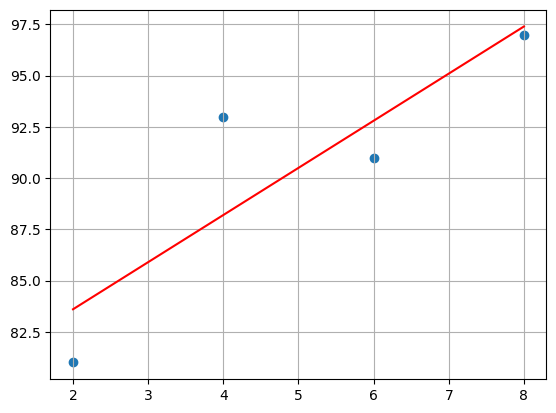

In [95]:
# 그래프를 그려보자
import matplotlib.pyplot as plt
y_model = a * X + b
plt.scatter(X,y)
plt.plot(X,y_model,"r")
plt.grid(True)
plt.show()

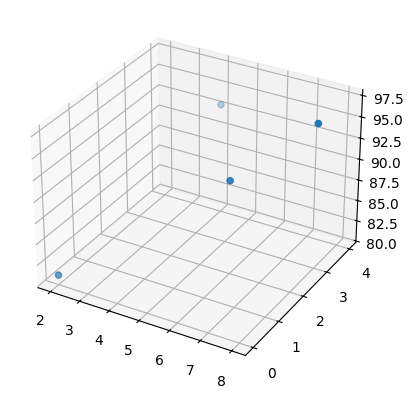

In [102]:
# input 2개인 것도 가능

# 다중 선형 회귀 (multiple linear regression)
# 에서 경사 하강법으로 a1, a2, b 구해보자
X1 = np.array([2, 4, 6, 8]) # 공부 시간
X2 = np.array([0, 4, 2, 3]) # 과외 횟수
y = np.array([81, 93, 91, 97]) # 성적

# 3차원으로 그래프로 그려보자
fig = plt.figure() # 그래프 그릴 도화지
graph = fig.add_subplot(111, projection="3d") # 1행 1열 1번째에 3d로 그리겠다
graph.scatter3D(X1, X2, y)
plt.show()


In [132]:
# 학습을 위한 기본 설정
# 경사하강법
a1, a2, b = 0, 0, 0 # 모름...
lr = 0.01 # 일단 학습률은 작게 출발
epochs = 10000


for i in range(1,epochs+1):
# 여기서는 나눠서 진행
    y_pred = a1 * X1 + a2 * X2 + b
    error = y - y_pred
    
    a1_diff = -(2 / n) * sum(x1_i * (e) for (x1_i, e) in zip(X1, error))
    a2_diff = -(2 / n) * sum(x2_i * (e) for (x2_i, e) in zip(X2, error))
    b_diff = -(2 / n) * sum(e for e in error)
    if i %1000 == 0:    
        print(f"epochs : {i}, a1: {a1},  a2: {a2}, b: {b}")

    a1 = a1 - lr * a1_diff 
    a2 = a2 - lr * a2_diff
    b = b - lr * b_diff

epochs : 1000, a1: 1.9612402046360067,  a2: 2.4449700918579795, b: 74.69026942393315
epochs : 2000, a1: 1.5192279722172837,  a2: 2.2923532694481485, b: 77.7251236754293
epochs : 3000, a1: 1.500801566975022,  a2: 2.2859910486536457, b: 77.85163930144103
epochs : 4000, a1: 1.5000334153600983,  a2: 2.285725823282035, b: 77.85691342741168
epochs : 5000, a1: 1.5000013930043632,  a2: 2.285714766687173, b: 77.85713329278038
epochs : 6000, a1: 1.5000000580709223,  a2: 2.2857143057648606, b: 77.85714245842814
epochs : 7000, a1: 1.500000002420847,  a2: 2.2857142865501507, b: 77.85714284052133
epochs : 8000, a1: 1.5000000001009228,  a2: 2.2857142857491315, b: 77.85714285644993
epochs : 9000, a1: 1.500000000004211,  a2: 2.2857142857157386, b: 77.85714285711394
epochs : 10000, a1: 1.500000000000318,  a2: 2.285714285714393, b: 77.85714285714067


In [133]:
y_test = a1 * 6 + a2 * 2 + b
y_test

np.float64(91.42857142857136)

In [134]:
# 로지스틱 회귀에서 MSE 사용이 어려울 때
# 교차 엔트로피 오차 함수 (cross entropy error)
# 

# 시그모이드 함수
# a값이 클수록 | 세로 y 축에 평행, a 값이 작을수록 그래프가 눕는 모양 x축에 평행
# b 값이 클 때, 왼쪽으로 평행이동


In [137]:
# 우리가 만든 모델과 딥러닝으로부터 학습한 모델 비교

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([2,4,6,8])
y = np.array([81,93,91,97])

model = Sequential()
model.add(Dense(1, input_dim =1, activation = "linear"))

model.compile(optimizer="sgd", loss="mse")
model.fit(X,y,epochs= 500, verbose = 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


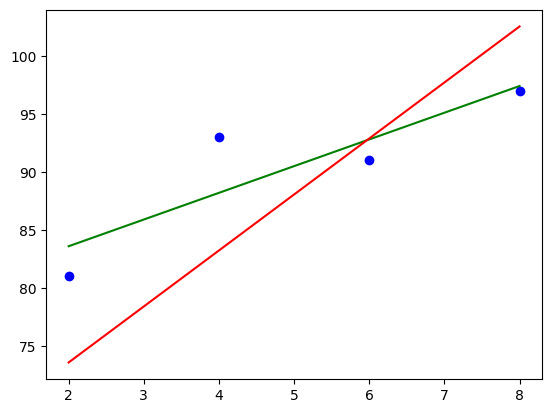

In [143]:
y_custom = 2.3*X + 79.0
plt.plot(X,y_custom,c="green")
y_pred = model.predict(X)
plt.scatter(X,y, c="blue")
plt.plot(X,y_pred,"r")
plt.show()

In [ ]:
# 로지스틱 회귀 -> 오후

In [ ]:
# AI 로봇 과정
# Main : 로봇 -> 깊게
# AI : 사용 가능하게 (적용 가능하게) 정도 ///어려우면 이정도만 해도 됨.
# 각 상황에서 어떤 model을 쓰면 되는지 이해할 수 있도록

In [145]:
# 로지스틱 회귀를 tensorflow(keras)에서 써 보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

X = np.array([2,4,6,8,10,12,14])
y = np.array([0,0,0,1,1,1,1]) #0:불합격 ,1:합격

model = Sequential() # 딥 러닝 모델
model.add(Dense(1,input_dim=1,activation="sigmoid")) # 이 Layer를 통해 출력값이 하나다(1)
model.compile(optimizer="sgd",loss = "binary_crossentropy")
model.fit(X,y,epochs = 500, verbose =0) # verbose  = 0 : 출력결과 x , = 1: 출력결과 확인

C:\ProgramData\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


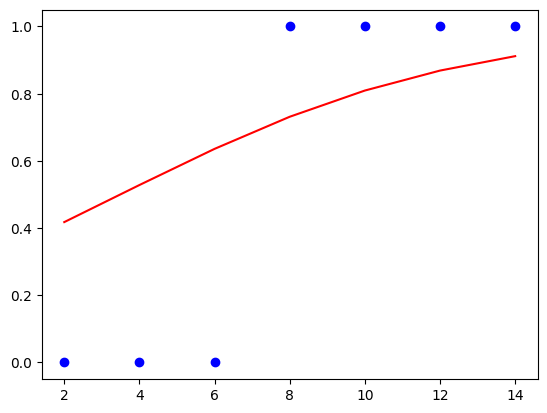

In [150]:
# 모델 그래프 그리기
plt.scatter(X,y,c="blue")
y_pred = model.predict(X)
plt.plot(X, y_pred,"r")
plt.show()

In [163]:
# 7시간 공부했을 때는 합격일까 ?
model.predict(np.array([7]))
# tensorflow 를 활용하여 예측
import tensorflow as tf
hour = 7
input_data = tf.constant([[hour]],dtype=tf.float32)
pred_prob = model.predict(input_data)[0][0]
print(f"{hour}시간 공부 시 합격 확률 : {pred_prob*100}%")
#합/불 여부
print("합격" if pred_prob>= 0.5 else "불합격")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
7시간 공부 시 합격 확률 : 68.55022430419922%
합격


In [ ]:
# 퍼셉트론 : 
# 아달라인 :선이 하나만 그어지게 ~
# 로지스틱 회귀 모델 : 시그모이드 함수
# 

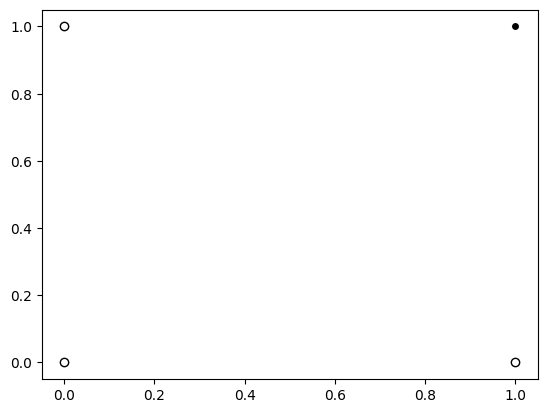

In [165]:
plt.scatter(0,0, c ="white", edgecolors ="black")
plt.scatter(0,1, c ="white", edgecolors ="black")
plt.scatter(1,0, c ="white", edgecolors ="black")
plt.scatter(1,1, c ="black", edgecolors ="white")
plt.show()
# AND gate 
# OR gate 
# 4 개의 점을 선을 하나 그어서 구분
# XOR gate:두개가 다를 때만 참 -> 선 하나로 구분짓기 어려움.
# 해결 방안
# 2가지 해결 방안 : 다층 퍼셉트론 (multiple perceptron) / 오차 역전파(back propagation)
# 성냥 6개로 삼각형 4개 -> 정사면체(입체로)
# NAND OR AND
# 첫 번째 input 에 대해서 1번모델에 대한 가중치 W_12 2번째 모델에 대한 가중치 W_12
# 두 번째 input 에 대해서 1번모델에 대한 가중치 W_21 2번째 모델에 대한 가중차 W_22
# 각 모델(n1,n2)~ W_31/W_32
# 

In [173]:
# 다층 퍼셉트론으로 XOR 해결하기
# 가중치, 바이어스
w11 = np.array([-2,-2]) #w1의 컬럼 1 
w12 = np.array([2,2]) # w2의 컬럼2
w2 = np.array([1,1])
b1 = 3  
b2 = -1 
b3 = -1

#가중치와 바이어스가 들어오면 결과 리턴해주는 함수(다층 퍼셉트론:Multiple Layer Perceptron)
def MLP(x, w, b):
    # x = (1,0)
    # w = (-2,
    #      -2)
    # b =3
    y = np.sum(w * x) + b #어레이를 내적 합한 뒤 b까지 더해서 리턴
    if y <= 0:
        return 0
    else:
        return 1
    
def NAND(x1,x2):
    return MLP(np.array([x1,x2]),w11,b1)
def OR(x1,x2):
    return MLP(np.array([x1,x2]),w12,b2)
def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)

#최종 모델 XOR
def XOR(x1,x2):
    return AND(NAND(x1,x2), OR(x1,x2))


In [174]:
xor_data = [(0,0),(0,1),(1,0),(1,1)]
for data in xor_data:
    print(f"{data}: {XOR(data[0],data[1])}")

(0, 0): 0
(0, 1): 1
(1, 0): 1
(1, 1): 0


In [ ]:
# 역전파 
# 실제 값과 비교해 출력층 가중치 수정 > 은닉충 가중치 수정 (거꾸로 거슬러 올라가는 모형)


In [187]:
# AND GATE를 퍼셉트론으로 구현해 보기
# (0, 0) : 0
# (0, 1) : 0
# (1, 0) : 0
# (1, 1) : 1

# y = w1 * x1 + w2 * x2 + b
w1 = 0.2
w2 = 6.3
b = 9
lr = 0.01

X = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 0, 0, 1])

# y값이 0이상이다 -> 1
# y값이 0미만이다 -> 0
def step_function(value):
    return 1 if value >= 0 else 0

epochs = 0
while True:
    error_count = 0 # 오차의 개수
    for x, yi in zip(X, y):
        y_pred = step_function(w1 * x[0] + w2 * x[1] + b)
        y_real = yi
        error = y_real - y_pred
    
        # 예측 -> 오차가 발생하면 바로바로 수정
        w1 = w1 + lr * error * x[0]
        w2 = w2 + lr * error * x[1]
        b = b + lr * error
        
        # 오차의 개수를 세자
        error_count += abs(error)

    epochs += 1
    # for 문 1바퀴 돈 후 error_count를 확인
    if error_count == 0:
        print(f"w1 : {w1}, w2 : {w2}, b : {b}, 학습횟수 : {epochs}")
        break


# 결과를 가지고 w,b를 수정 -> 역전파


w1 : 0.02000000000000031, w2 : 1.470000000000091, b : -1.4899999999998534, 학습횟수 : 696


In [190]:
# OR GATE를 퍼셉트론으로 구현해 보기
# (0, 0) : 0
# (0, 1) : 1
# (1, 0) : 1
# (1, 1) : 1

# y = w1 * x1 + w2 * x2 + b
w1 = 0
w2 = 0
b = 0
lr = 0.01

X = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 1, 1, 1])

# y값이 0이상이다 -> 1
# y값이 0미만이다 -> 0
def step_function(value):
    return 1 if value >= 0 else 0

epochs = 0
while True:
    error_count = 0 # 오차의 개수
    for x, yi in zip(X, y):
        y_pred = step_function(w1 * x[0] + w2 * x[1] + b)
        y_real = yi
        error = y_real - y_pred
    
        # 예측 -> 오차가 발생하면 바로바로 수정
        w1 = w1 + lr * error * x[0]
        w2 = w2 + lr * error * x[1]
        b = b + lr * error
        
        # 오차의 개수를 세자
        error_count += abs(error)

    epochs += 1
    # for 문 1바퀴 돈 후 error_count를 확인
    if error_count == 0:
        print(f"w1 : {w1}, w2 : {w2}, b : {b}, 학습횟수 : {epochs}")
        break

w1 : 0.01, w2 : 0.01, b : -0.01, 학습횟수 : 4


In [ ]:
# 여러 은닉층을 쌓으면서
# 역전파를 통해 가중치 업데이트를 거꾸로 진행하고 있었다
# 은닉층이 많으니 처음 쌓은 층(layer)의 가중치는 수정할 확률이 줄어듦
# -> 기울기 소실 
# 해결하고자 ReLu 활성화 함수를 도입
# 이전 시그모이드 함수에서는 여러 층을 진행하면
# 0 ~ 1로 출력 결과가 정해짐!!
# ReLu는 양의 범위에서 원 데이터 (y=x) 정보를 갖고 있기 때문에
# 상대적으로 가중치를 수정하기 위해 거슬러 올라오는 범위가
# 입력층까지 올 수 있게 되었다

In [193]:
# 확률적 경사하강법
# > 빠른 대신에 데이터를 학습하는 과정에서 변동성이 크다
# 모멘텀을 적용한 확률적 경사 하강법
# > 지그재그가 덜함

# 환경설정 이후에 돌렸었던 코드 다시 한 번 보자
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

dataset = np.loadtxt("robot/data/ThoraricSurgery3.csv",delimiter=",")
X = dataset [ :, :16]
y = dataset [ :,16]

model = Sequential()
model.add(Dense(30, input_dim=16,activation="relu")) #층마다 출력 결과 30개, feature 16개 ,활성화 함수 relu
model.add(Dense(1,activation="sigmoid")) # 출력 결과를 sigmoid 사용해서 0, 1범위로 변환
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
# 모델에 대한 오차 -> MSE 제곱평균오차 대신에 로지스틱 회귀처럼 분류타입이므로 cross-entropy씀.
# 오차를 수정해 나가는 방식을 경사하강법 최종 형태인 "adam"을 사용
# 평가 지표는 정확도
model.fit(X,y,epochs=50,verbose=0)

# 최종 결과 
# 이 학습한 모델을 가지고 다른 곳에서도 적용 가능.
# 이 컴퓨터에 GPU가 없어서 구글 colab에서 학습하고 그걸 가져올 것
# 이 중 우리가 선정한 평가지표(정확도) 기준
# 정확도가 가장 높은 모델 또는 가장 마지막 모델을 사용

C:\ProgramData\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!pip install seaborn

In [201]:
# 정상-당뇨 판별 모델
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# pandas 를 가져오는 이유 : 데이터 처리 ,jupyter notebook 상 시각화가 용이함.
df = pd.read_csv("robot/data/pima-indians-diabetes3.csv")
df.head() # diabetes : 당뇨가 1 정상이 0
df["diabetes"].value_counts() # 당뇨가 268명 /정상 500명
df.corr() # 상관관계

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


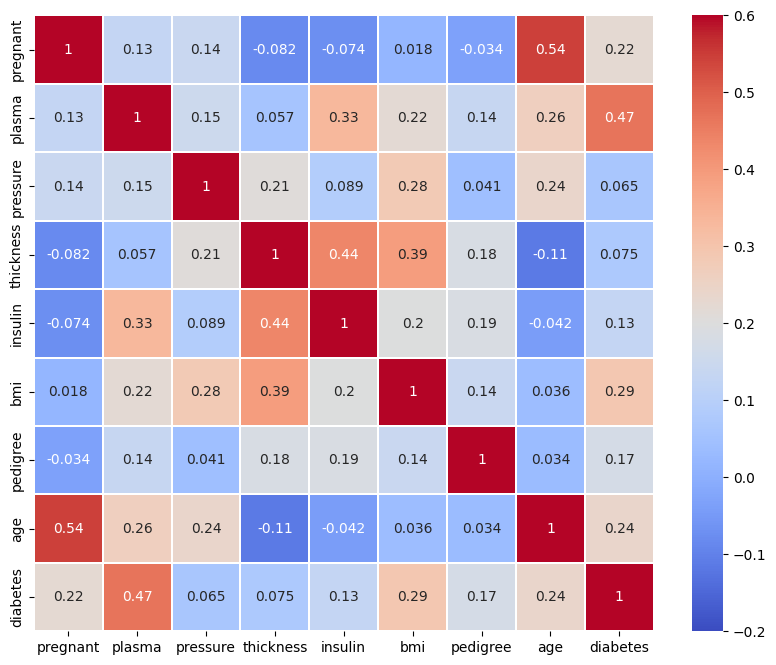

In [207]:
# 상관관계 계수(corr)를 seaborn 활용해서 heatmap 찍어보자.

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=0.6, vmin=-0.2, cmap="coolwarm",linewidths=0.1,annot=True)
plt.show()

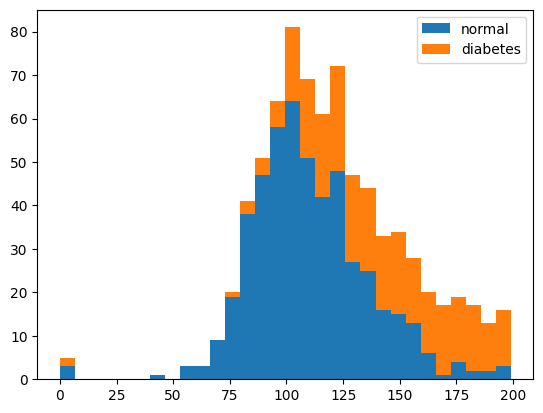

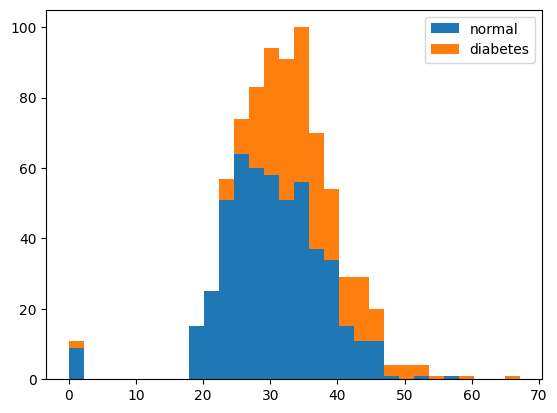

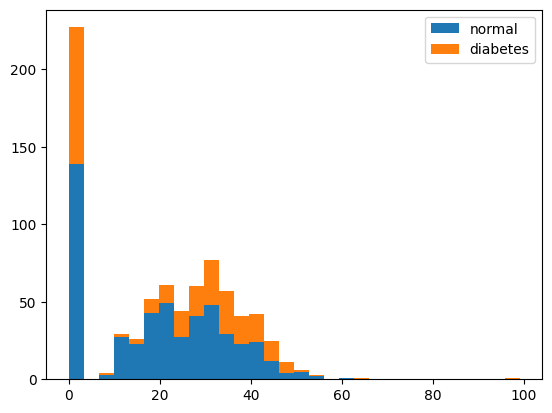

In [214]:
# 전처리
# 어떤 feature를 사용할건지
# plasma, bmi를 조금 더 명확하게 확인

# plasma 기준 정상과 당뇨가 얼마나 있는지 히스토그램

plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], histtype="barstacked", bins=30, label=["normal", "diabetes"])
plt.legend()
plt.show()

# bmi 기준
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], histtype="barstacked", bins=30, label=["normal", "diabetes"])
plt.legend()
plt.show()

# thickness 기준
plt.hist(x=[df.thickness[df.diabetes==0], df.thickness[df.diabetes==1]], histtype="barstacked", bins=30, label=["normal", "diabetes"])
plt.legend()
plt.show()

In [222]:
# 경향성을 보이는 데이터 : plasma, bmi
# 8개의 feature를 가지고 학습
# 전부
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 1) 8개의 feature
X = df.iloc[:,:8]
y = df.iloc[:,8]
model = Sequential()
model.add(Dense(16,input_dim = 8, activation="relu", name="Dense1"))
model.add(Dense(8,activation="relu",name = "Dense2"))
model.add(Dense(1,activation="sigmoid",name= "Dense3"))
# 오차, 오차 수정
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X,y, epochs=50)

Epoch 1/50


C:\ProgramData\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3672 - loss: 6.6304    
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5469 - loss: 2.5191 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5221 - loss: 2.0241 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5495 - loss: 1.5763 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5495 - loss: 1.3426 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5534 - loss: 1.1928 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5651 - loss: 1.0801 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5586 - loss: 0.9978 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 0.9109 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 0.8571 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5990 - loss: 0.8202 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6068 -

In [221]:
# 경향성을 보이는 데이터 : plasma, bmi
# 8개의 feature를 가지고 학습
# 2개만 가지고 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1) 8개의 feature
X = df.loc[:,["plasma","bmi"]]
y = df.iloc[:,8]
model = Sequential()
model.add(Dense(4,input_dim = 2, activation="relu", name="Dense1"))
model.add(Dense(4,activation="relu",name = "Dense2"))
model.add(Dense(1,activation="sigmoid",name= "Dense3"))
# 오차, 오차 수정
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X,y, epochs=50)

Epoch 1/50


C:\ProgramData\anaconda3\envs\robot\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4557 - loss: 2.5112   
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4388 - loss: 1.9423 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4466 - loss: 1.3977 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 0.9823 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 0.7867 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 0.7409 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.7237 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6328 - loss: 0.7252 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 0.7120 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - loss: 0.7082 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 0.7081 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - 